### State Population Analysis

##### Import necessary libraries

In [44]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import wquantiles
from statsmodels import robust
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [3]:
data = pd.read_csv('state.csv')
data.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


## Display the first few rows of the dataset to understand its structure
#### The columns are:
#### - State: Name of the U.S. state
#### - Population: Population count (2010 Census)
#### - Murder Rate: Number of murders per 100,000 people


#### Calculate and display the mean of the population
#### Mean is the average of all values. It is sensitive to outliers.

In [4]:
print("Mean of Population:", data['Population'].mean())

Mean of Population: 6162876.3



#### Trimmed Mean: This eliminates a percentage of extreme values (both ends) to provide a robust estimate of location.
#### Here, 20% of the highest and lowest values are excluded.

In [5]:
print("Trimmed Mean of Population (by removing highest and lowest 20% data ):", stats.trim_mean(data['Population'],0.2))

Trimmed Mean of Population (by removing highest and lowest 20% data ): 4413915.966666667


#### Median: The middle value in the sorted data, robust to outliers.

In [6]:
print("Median of Population:", data['Population'].median())

Median of Population: 4436369.5



#### Weighted Mean: Adjusts for the population of each state when calculating the average murder rate.

In [7]:
np.average(data['Murder.Rate'], weights=data['Population'])

np.float64(4.445833981123393)

#### Weighted Median: Similar to the weighted mean but calculates the middle value based on weights.

In [8]:
wquantiles.median(data['Murder.Rate'],weights=data['Population'])

np.float64(4.4)

**Standard Deviation**: It measures the amount of variation or dispersion of a set of values. A low standard deviation means the values tend to be close to the mean, whereas a high standard deviation indicates that the values are spread out over a wider range.


In [10]:
data['Population'].std()

np.float64(6848235.347401142)

**Interquartile Range (IQR)**: The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) in a dataset. It is a measure of statistical dispersion, indicating the spread of the middle 50% of the data.

 **IQR Formula**: 
  \[
  IQR = Q3 - Q1
  \]

In [11]:
data['Population'].quantile(0.75) - data['Population'].quantile(0.25)

np.float64(4847308.0)

**Median Absolute Deviation (MAD)**: The MAD is a robust statistic used to measure the spread or dispersion of a dataset. It is less sensitive to outliers compared to the standard deviation.


In [12]:
robust.scale.mad(data['Population'])

np.float64(3849876.1459979336)

- **Quantiles**: Quantiles divide the data into intervals with equal probabilities. They provide a deeper understanding of the distribution of the dataset.
  
- **Percentiles**:
  - `0.05` quantile corresponds to the **5th percentile**, which means 5% of the values are below this value.
  - `0.25` quantile corresponds to the **25th percentile** (Q1), also known as the first quartile.
  - `0.5` quantile corresponds to the **50th percentile** (Q2), which is also the **median**.
  - `0.75` quantile corresponds to the **75th percentile** (Q3), also known as the third quartile.
  - `0.95` quantile corresponds to the **95th percentile**, where 95% of the values fall below this value.


In [49]:
data['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

- **Boxplot**: A boxplot (or box-and-whisker plot) is used to display the distribution of a dataset. It shows the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values, along with potential outliers.
  - The **box** represents the interquartile range (IQR) between Q1 and Q3.
  - The **whiskers** extend to the smallest and largest values within a certain range (usually 1.5 times the IQR).
  - **Outliers** are typically displayed as individual points outside the whiskers.


Text(0, 0.5, 'Population (in millions)')

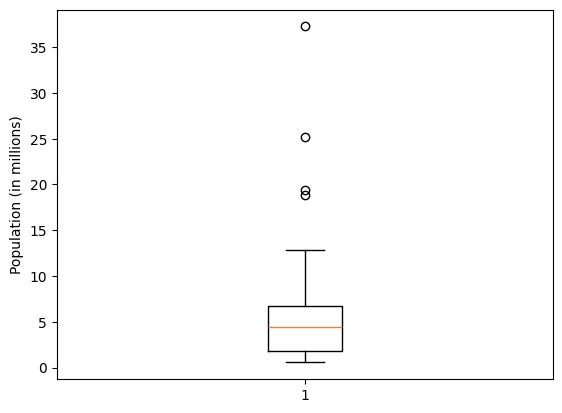

In [25]:
plt.boxplot(data[['Population']]/1000000)
plt.ylabel("Population (in millions)")

- **Histogram**: A histogram is used to visualize the distribution of a dataset by dividing the data into bins and counting how many data points fall into each bin. It helps identify patterns such as the skewness, modality (e.g., whether the data is unimodal or bimodal), and the spread of the data.
  - **Bins**: The x-axis represents the population values divided into intervals (bins), and the y-axis represents the frequency (count) of population values within each bin.
  

Text(0.5, 0, 'Population (millions)')

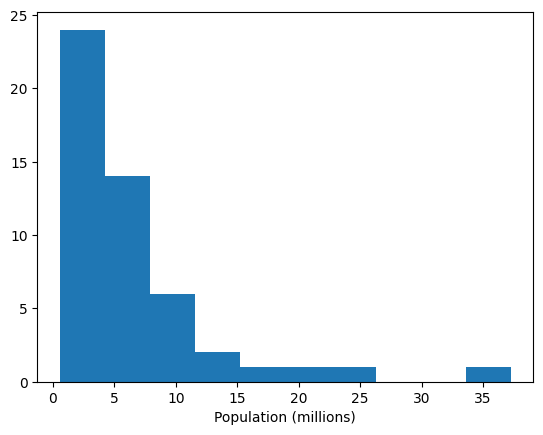

In [28]:
plt.hist(data['Population']/1000000)
plt.xlabel('Population (millions)')

 **Density Histogram**: A density histogram combines the features of a histogram and a Kernel Density Estimate (KDE). The histogram shows the distribution of the data, while the KDE provides a smooth curve representing the probability density function.
  - **Bins**: The `bins=30` parameter defines the number of bins for the histogram.
  - **KDE**: The `kde=True` parameter adds a smoothed curve to the histogram, giving a better view of the data distribution and making it easier to identify patterns or trends.
  - **Stat="density"**: The `stat="density"` parameter scales the histogram so that the area under the histogram sums to 1, allowing the plot to show a normalized density distribution.


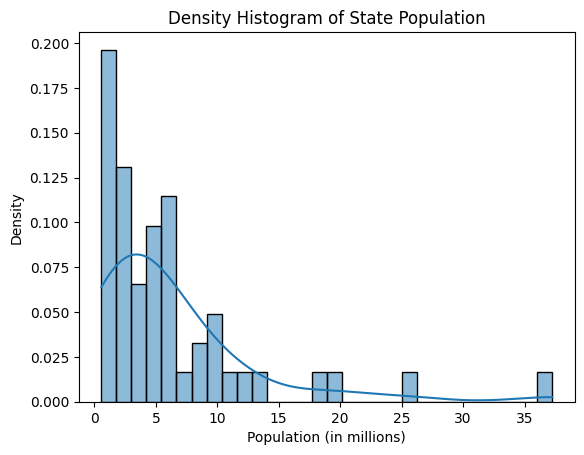

In [48]:

# Plotting the density histogram
sns.histplot(data['Population']/1000000,bins=30, kde=True, stat="density",)
plt.xlabel('Population (in millions)')
plt.ylabel('Density')
plt.title('Density Histogram of State Population')
plt.show()